#### (Home credit competition 중심으로)
## 1.A Pandas 를 사용하여 null data rate 보기

---
### 소스 및 데이터는 아래 kaggle을 참조하였습니다. 

* 캐글 주소 : https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
* 해당 커널의 한글 번역은 파파고와 구글을 활용하였습니다.
___

* 이 kaggle의 목표는 훈련용 데이터에 있는 고객의 대출신청서 및 관련 금융거래 정보를 바탕으로 대출금 상환여부에 대한 모델을 학습한다.
* 훈련용 데이터에 의해 학습된 모델을 가지고 테스트용 데이터를 적용하여 대출금 상환여부에 대한 값을 구한다.
* 데이터베이스의 테이블 데이터를 CSV파일로 변환한 application_train.csv 에는 상환여부정보를 가지고 있는 int64형 Target 컬럼이 있다. ( 1 : 미상환, 0 : 상환 )
* 테스트용 데이터인 application_test.csv에는 대출금 상환여부 컬럼이 없다.
* 함께 제공된 관련 테이블에 대한 정보는 일단 두고 application_{train|test}.csv 데이터를 중심으로 null 데이터를 살펴본다.
* 이번 장을 통해 기초적인 데이터 탐색과 null data 처리에 대해 살펴 본다

### 라이브러리 import

In [1]:
# 라이브러리 
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

### 해당 디렉토리에 사용할 데이터 파일 목록 확인

In [2]:
print(os.listdir('d:/Projects/Cp/input/'))

['application_test.csv', 'application_test.csv.zip', 'application_train.csv', 'application_train.csv.zip', 'bureau.csv', 'bureau.csv.zip', 'bureau_balance.csv', 'bureau_balance.csv.zip', 'credit_card_balance.csv', 'credit_card_balance.csv.zip', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'installments_payments.csv.zip', 'POS_CASH_balance.csv', 'POS_CASH_balance.csv.zip', 'previous_application.csv', 'previous_application.csv.zip', 'sample_submission.csv', 'sample_submission.csv.zip']


### pandas를 이용한 훈련 데이터파일(.csv) 불러오기

In [3]:
app_train = pd.read_csv('d:/Projects/Cp/input/application_train.csv')

### 학습용 데이터 행렬구조 확인

In [4]:
print('Training data shape : ', app_train.shape)

Training data shape :  (307511, 122)


### 학습용 데이터 처음 5번째 행 출력

In [5]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### pandas를 이용한 테스트용 데이터파일(.csv) 불러오기
* 테스트용 데이터 행렬구조 확인
* 처음 5번째 행 출력

In [6]:
app_test = pd.read_csv('d:/Projects/Cp/input/application_test.csv')

print('Testing data shape : ', app_test.shape)
app_test.head()

Testing data shape :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


* 훈련용/테스트용 데이터의 컬럼수를 비교해 보면 테스트 데이터에 Target컬럼이 없는 것을 알 수 있음
* 훈련용 데이터 컬럼 수 : 122 (TARGET 컬럼 존재)
* 테스트용 데이터 컬럼 수 : 121 (TARGET 컬럼 미존재)

### 훈련용 데이터의 상환여부로 사용되는 TARGET 컬럼 데이터 값과 분포 구하기

In [7]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

* 대출금 상환여부 컬럼(target)
> 0 : 상환 ,
> 1 : 미상환

### target 컬럼값에 따른 분포(%)

In [8]:
yn_s = app_train['TARGET'].value_counts()[1]/app_train['TARGET'].value_counts()[0]*100
print('미상환 : ', yn_s)
yn_m = 100-yn_s
print('상  환 : ',yn_m)

미상환 :  8.781828601345662
상  환 :  91.21817139865433


### 상환/미상환 분포를 막대그래프로 표현

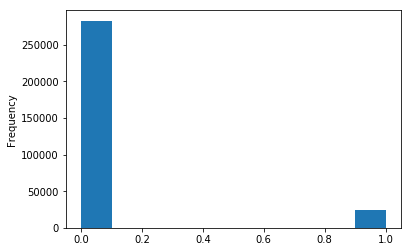

In [9]:
app_train['TARGET'].astype(int).plot.hist()

* 미상환 데이터 보다 상환된 데이터가 많은것을 보면 한쪽으로 치우진 불균형 클래스임을 알수 있습니다.

* hist() 메서드는 맷플롯립을 사용하고 결국 화면에 그래프를 그리기 위해 사용자 컴퓨터의 그래픽 백엔드를 필요로 합니다. 그래서 그래프를 그리기 전에 맷플롯립이 사용할 백엔드를 지정해줘야 합니다. 주피터의 매직 명령 %matplotlib inline을 사용하면 편리합니다. 이 명령은 맷플롯립이 주피터 자체의 백엔드를 사용하도록 설정합니다. 그러면 그래프는 노트북 안에 그려지게 됩니다. 주피터 노트북에서 그래프를 그릴 때 show() 메서드를 호출하는 것은 선택사항입니다. 주피터는 셀이 실행될 때 자동으로 그래프를 그려 줍니다.

> [ 참고자료 ]
https://tensorflow.blog/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-1%EC%9E%A5-2%EC%9E%A5/2-3-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EA%B0%80%EC%A0%B8%EC%98%A4%EA%B8%B0/ 

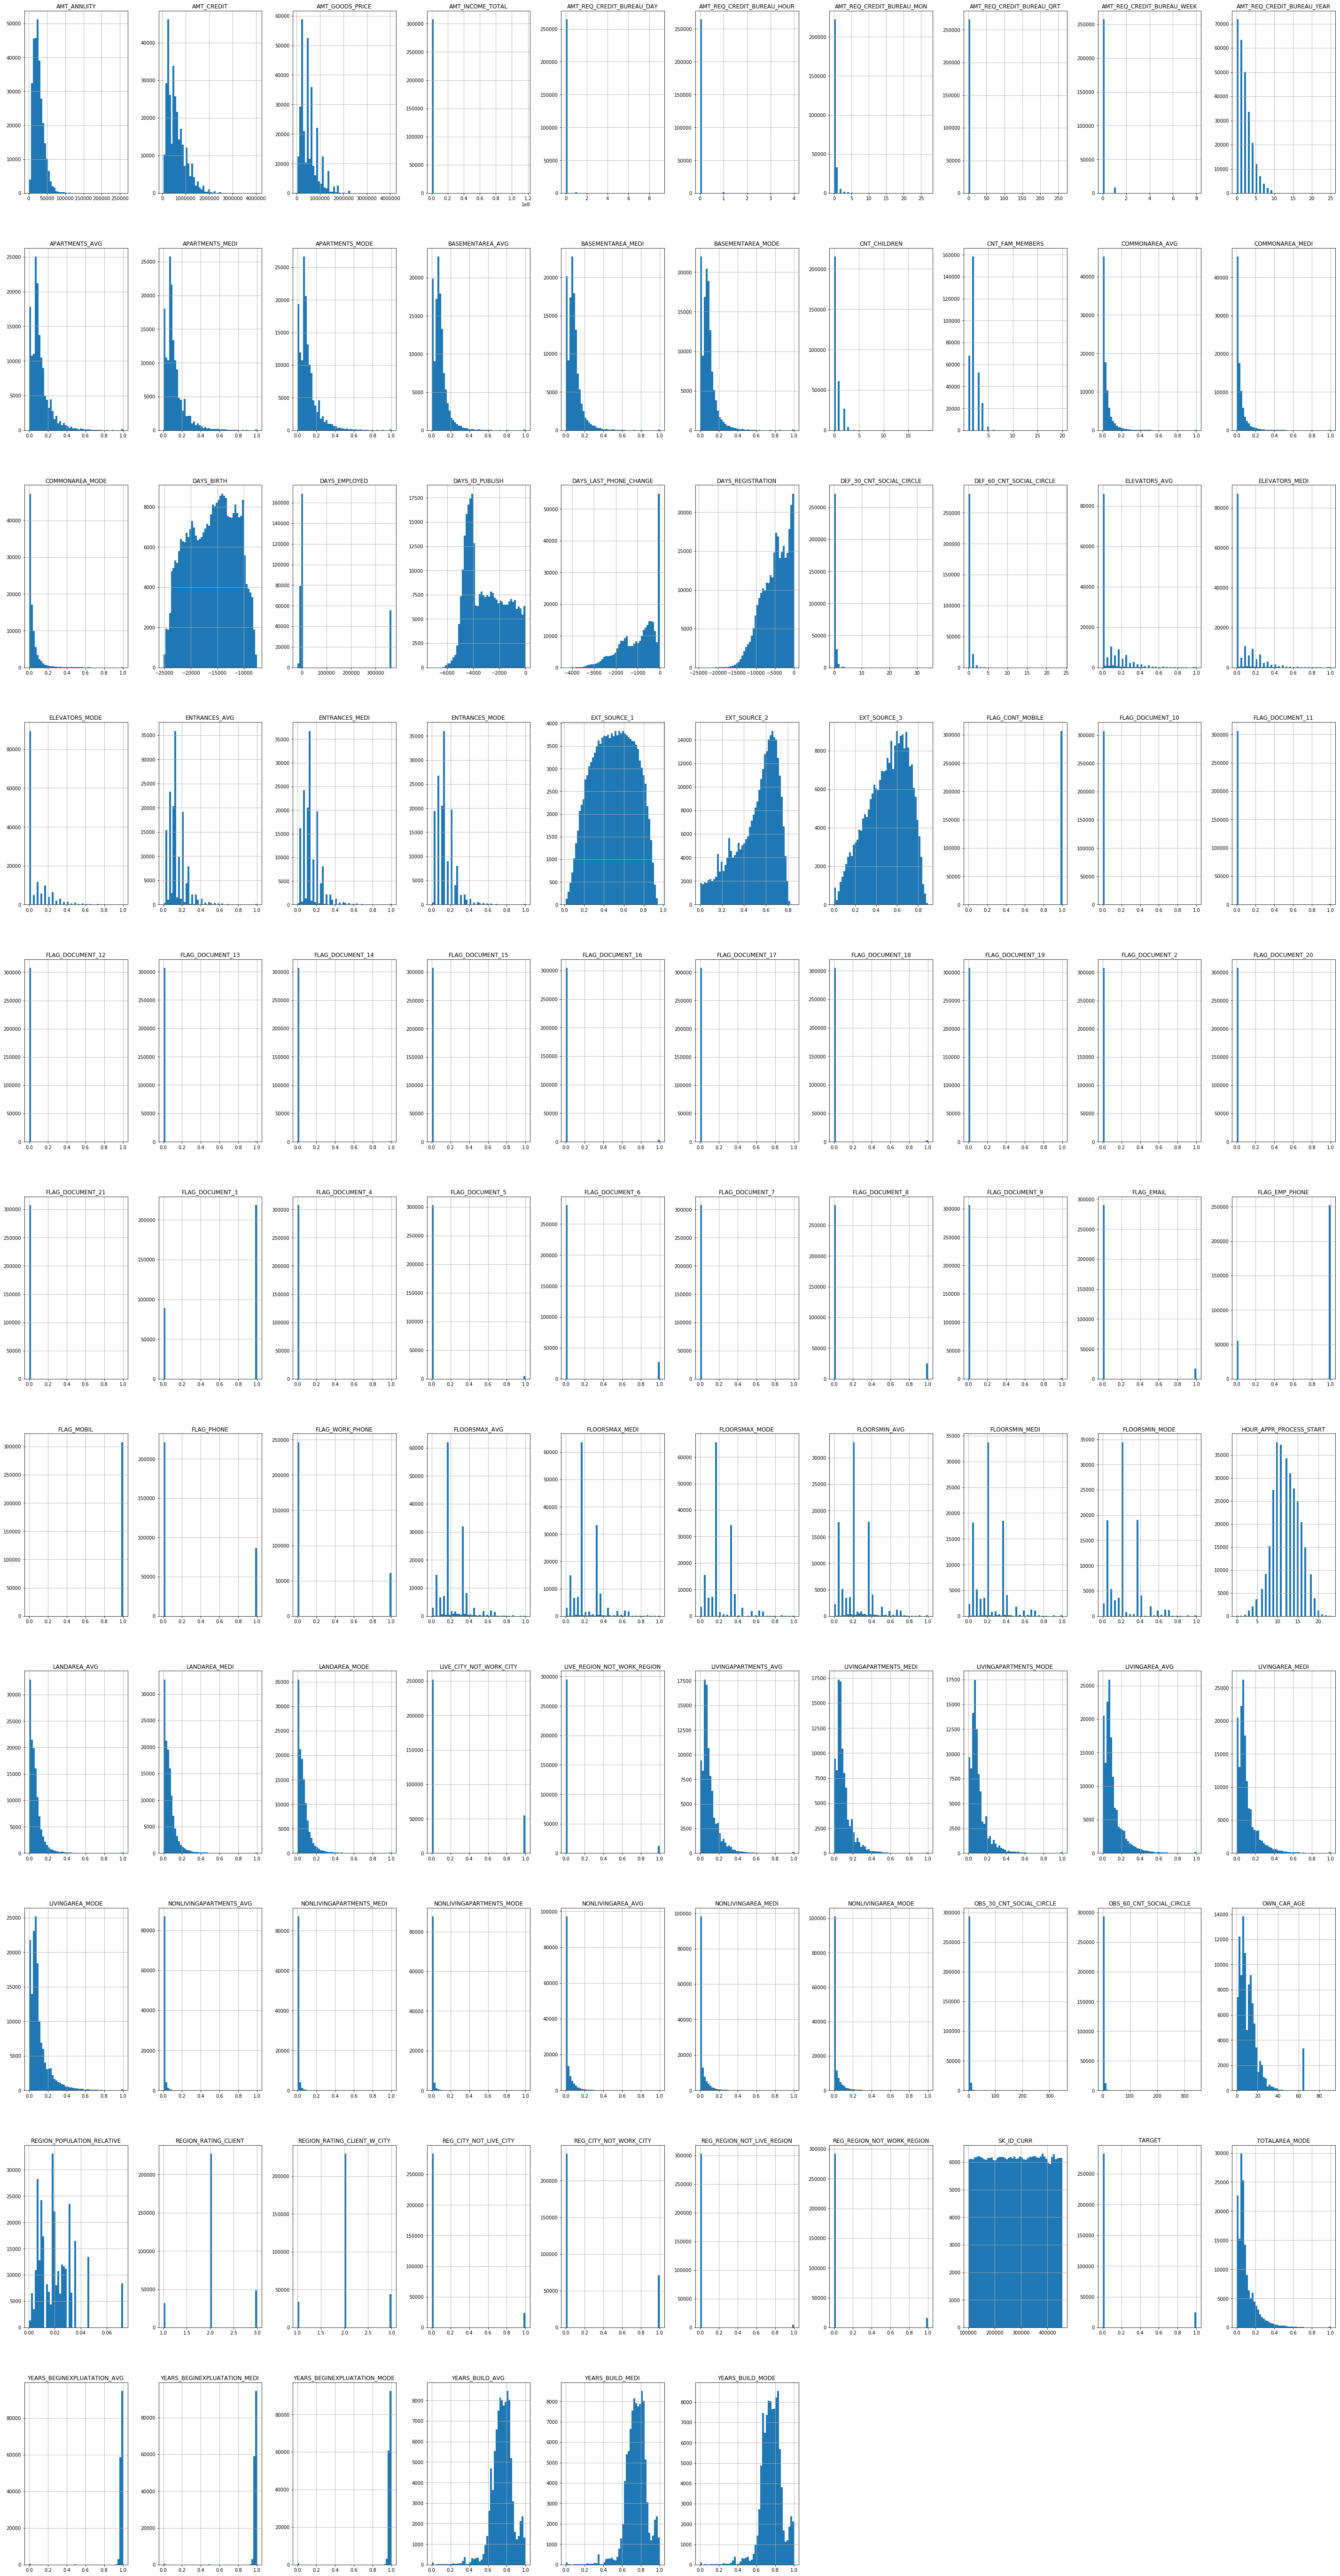

In [10]:
# 컬럼별 데이터 분포 확인
app_train.hist(bins=50, figsize=(50,100))
plt.show()